# Lab 3 - Principal Component Analysis (PCA)

## Failure Example - When PCA Does NOT work

Restart and run all to see how it changes!

(2, 200)


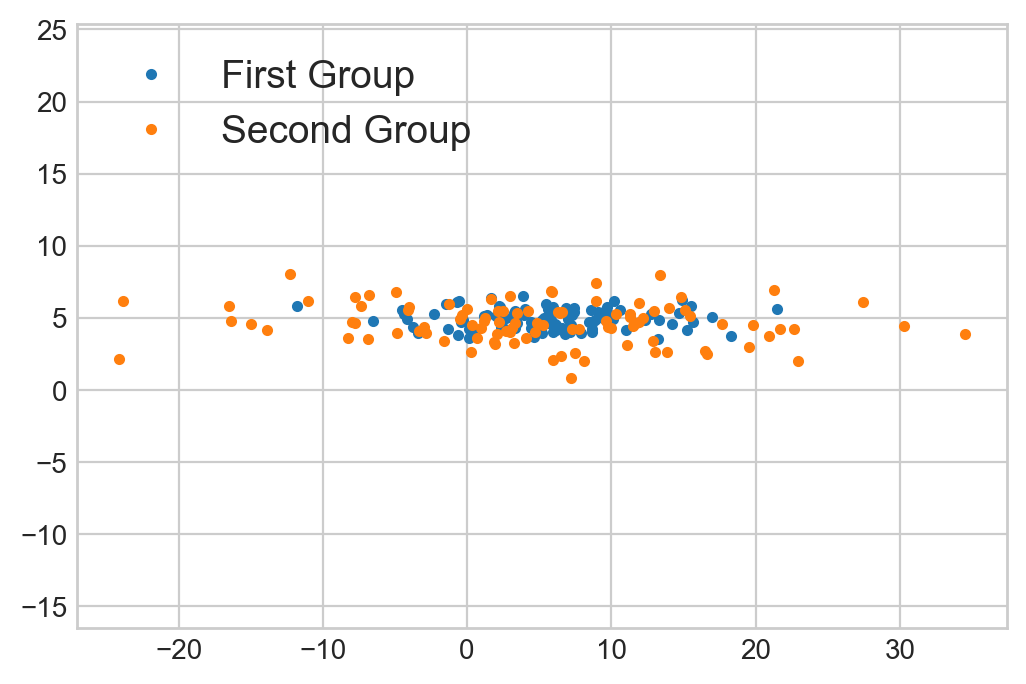

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy
plt.rcParams['figure.dpi'] = 200 # make plots bigger

mean = [0, 0]
cov = [[1.25, 0.0], [0.0, 0.5]]
n = 200

x1 = np.random.multivariate_normal(mean, cov, n//2).T 
x1 = x1 * np.array([5, 1]).reshape(2, 1) + np.array([5, 5]).reshape(2, 1)

x2 = np.random.multivariate_normal(mean, cov, n-n//2).T
x2 = x2 * np.array([10, 2]).reshape(2, 1) + np.array([5, 5]).reshape(2, 1)

orig_x = np.concatenate((x1.T, x2.T)).T

print(orig_x.shape)


with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.set_aspect('equal', 'datalim')
    plt.plot(x1[0], x1[1], '.', label='First Group')
    plt.plot(x2[0], x2[1], '.', label='Second Group')
    plt.legend(loc='upper left', fontsize=14)
    plt.show()

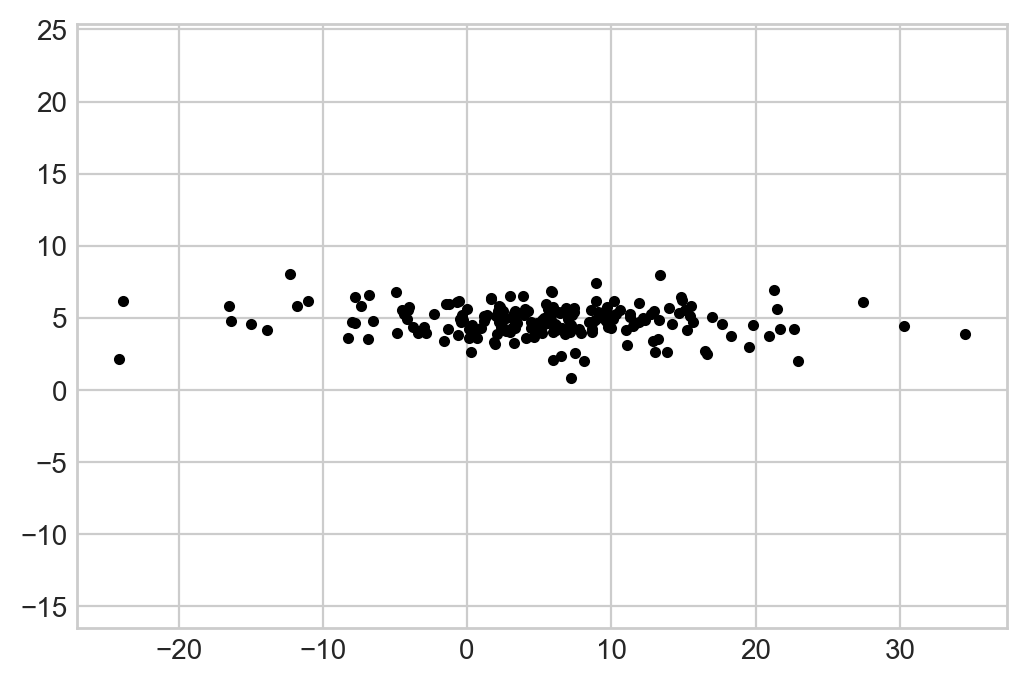

In [2]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.set_aspect('equal', 'datalim')
    plt.plot(orig_x[0], orig_x[1], '.', color='k')
    plt.show()

In [3]:
mean_x = np.mean(orig_x, axis = 1).reshape(2, 1)
c_x = orig_x - mean_x
print('Mean: ', mean_x.T)

std_x = np.std(c_x, axis = 1).reshape(2, 1)
print('Std. Dev.: ', std_x.T)
x = c_x/std_x

Mean:  [[5.30643463 4.80405505]]
Std. Dev.:  [[8.54399299 1.09569211]]


See how the 

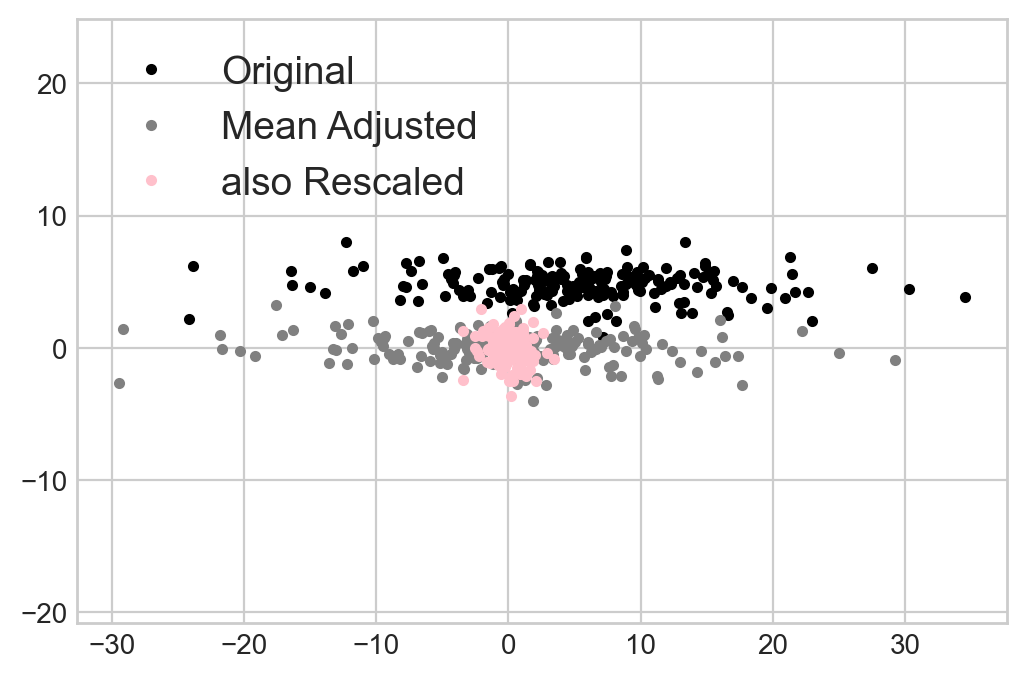

In [4]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.set_aspect('equal', 'datalim')
    plt.plot(orig_x[0], orig_x[1], '.', color='k', label='Original')
    plt.plot(c_x[0], c_x[1], '.', color='gray', label='Mean Adjusted')
    plt.plot(x[0], x[1], '.', color='pink', label='also Rescaled')
    plt.legend(loc='upper left', fontsize=14)
    plt.show()

In [5]:
cov_x = np.cov(x)
print('covariance matrix:')
print(cov_x)
w, v = np.linalg.eig(cov_x)
print('eigenvalues: ')
print(w)
print('eigenvectors: ')
print(v)

covariance matrix:
[[ 1.00502513 -0.1041813 ]
 [-0.1041813   1.00502513]]
eigenvalues: 
[0.90084383 1.10920642]
eigenvectors: 
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


See how the diagonal of the covariance matrix is near 1, and the
off-diagonal entries are near zero?

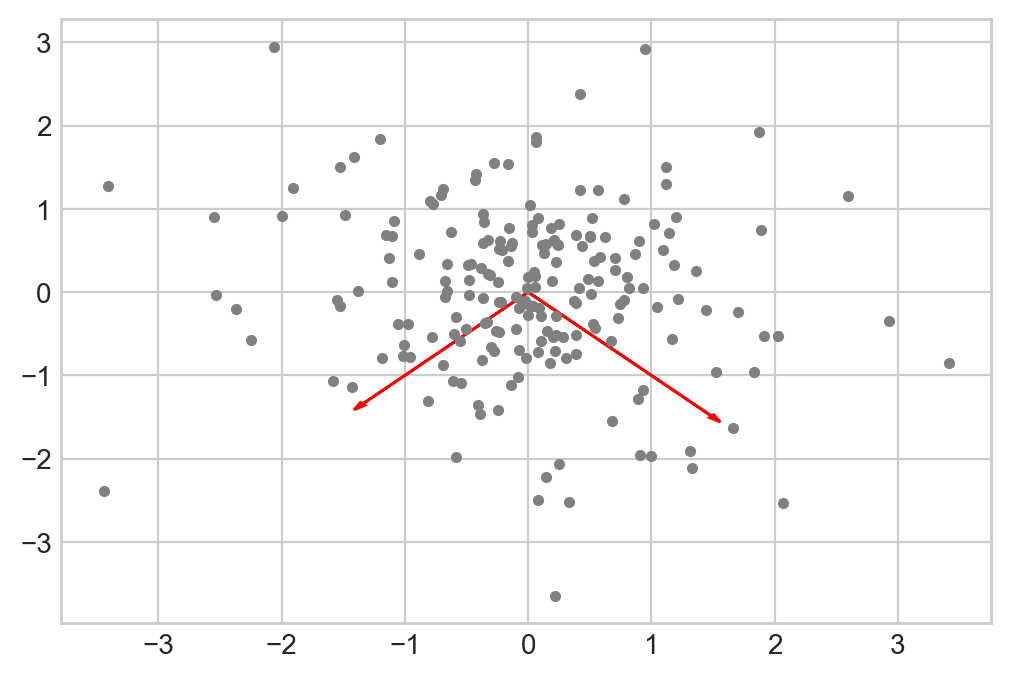

In [6]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.arrow(0, 0, v[0][0] * 2 * np.sqrt(w[0]), v[1][0] * 2 * np.sqrt(w[0]), head_width=0.05, head_length=0.1, fc='r', ec='r')
    ax.arrow(0, 0, v[0][1] * 2 * np.sqrt(w[1]), v[1][1] * 2 * np.sqrt(w[1]), head_width=0.05, head_length=0.1, fc='r', ec='r')
    plt.plot(x[0], x[1], '.', color='gray')
    plt.show()

[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


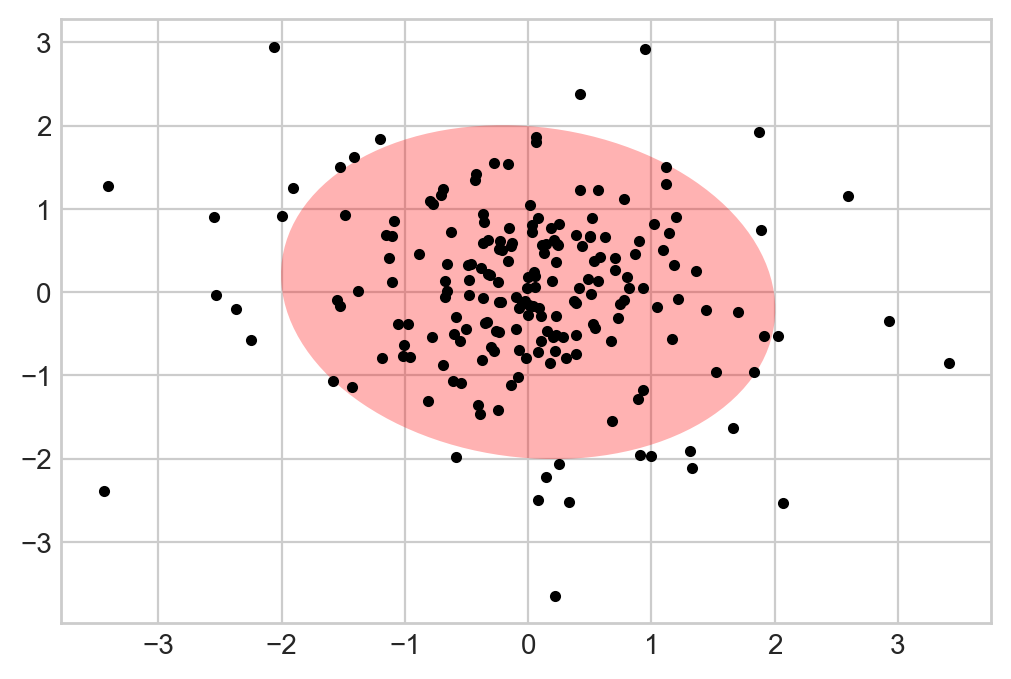

In [7]:
from matplotlib.patches import Ellipse

ellipse = Ellipse(
    (0, 0),
    2 * 2 * np.sqrt(w[0]),
    2 * 2 * np.sqrt(w[1]),
    -180*np.arctan(v[0][1]/v[0][0])/np.pi
)

print(v)

with plt.style.context('seaborn-whitegrid'):
    ellipse.set_alpha(0.3)
    ellipse.set_facecolor([1.0, 0.0, 0.0])
    ax = plt.axes()
    plt.plot(x[0], x[1], '.', color='k')
    ax.add_artist(ellipse)
    plt.show()
# Everything inside the pink is within 1σ (1 std dev)


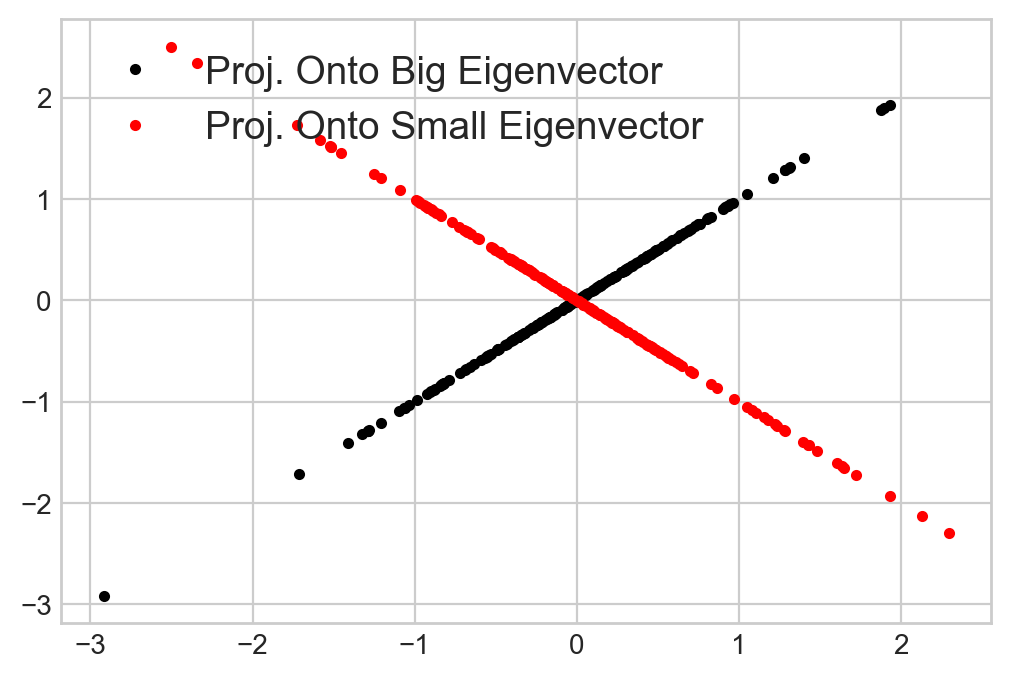

In [8]:
# basic vector projection. 
# we don't need to divide since they're already unit vectors
xt1v = x.T.dot(v[:,0]).reshape(n, 1).dot( v[:,0].reshape(1, 2))
xt2v = x.T.dot(v[:,1]).reshape(n, 1).dot( v[:,1].reshape(1, 2))

with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt1v[:, 0], xt1v[:, 1], '.', label='Proj. Onto Big Eigenvector', color='k')
    plt.plot(xt2v[:, 0], xt2v[:, 1], '.', label='Proj. Onto Small Eigenvector', color='r')
    plt.legend(loc='upper left', fontsize=14)
    plt.show()


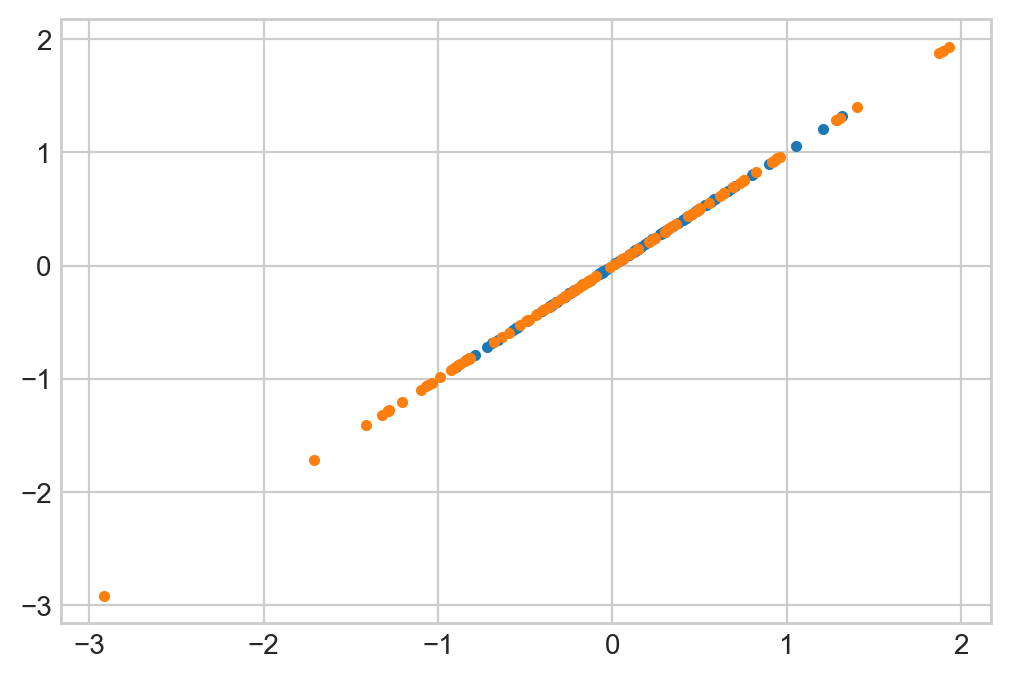

In [9]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt1v[:n//2, 0], xt1v[:n//2, 1], '.')
    plt.plot(xt1v[n//2:, 0], xt1v[n//2:, 1], '.')
    plt.show()


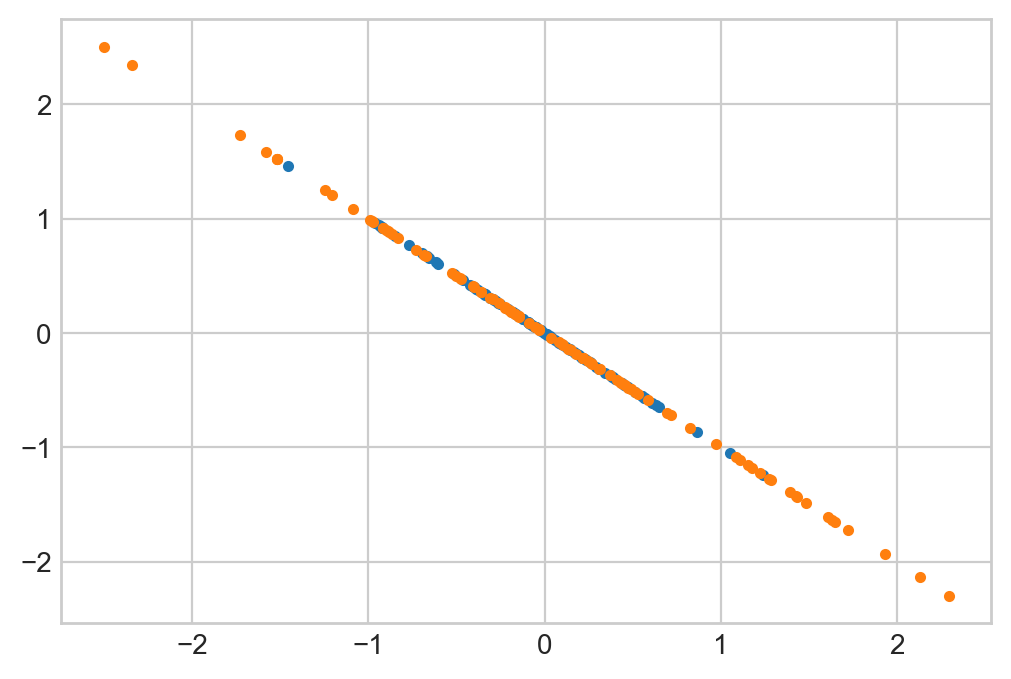

In [10]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt2v[:n//2, 0], xt2v[:n//2, 1], '.')
    plt.plot(xt2v[n//2:, 0], xt2v[n//2:, 1], '.')
    plt.show()


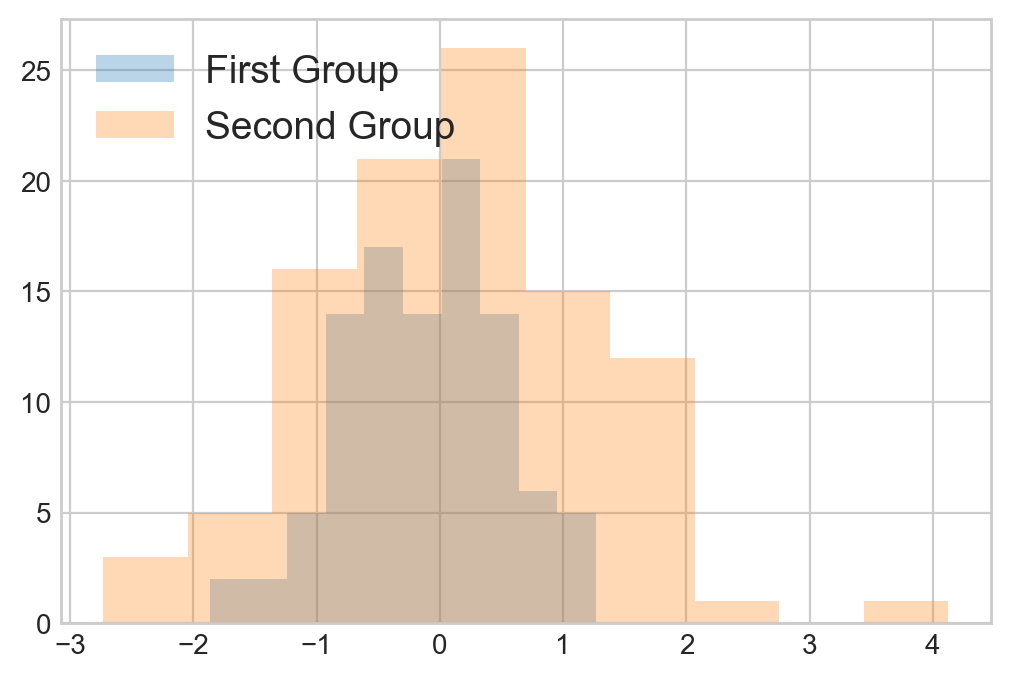

In [11]:
transform_1_x = x.T.dot(v[:,0])
transform_2_x = x.T.dot(v[:,1])

with plt.style.context('seaborn-whitegrid'):
    plt.hist(transform_1_x[:n//2], alpha=0.3, label="First Group")
    plt.hist(transform_1_x[n//2:], alpha=0.3, label="Second Group")
    plt.legend(loc='upper left', fontsize=14)

    plt.show()

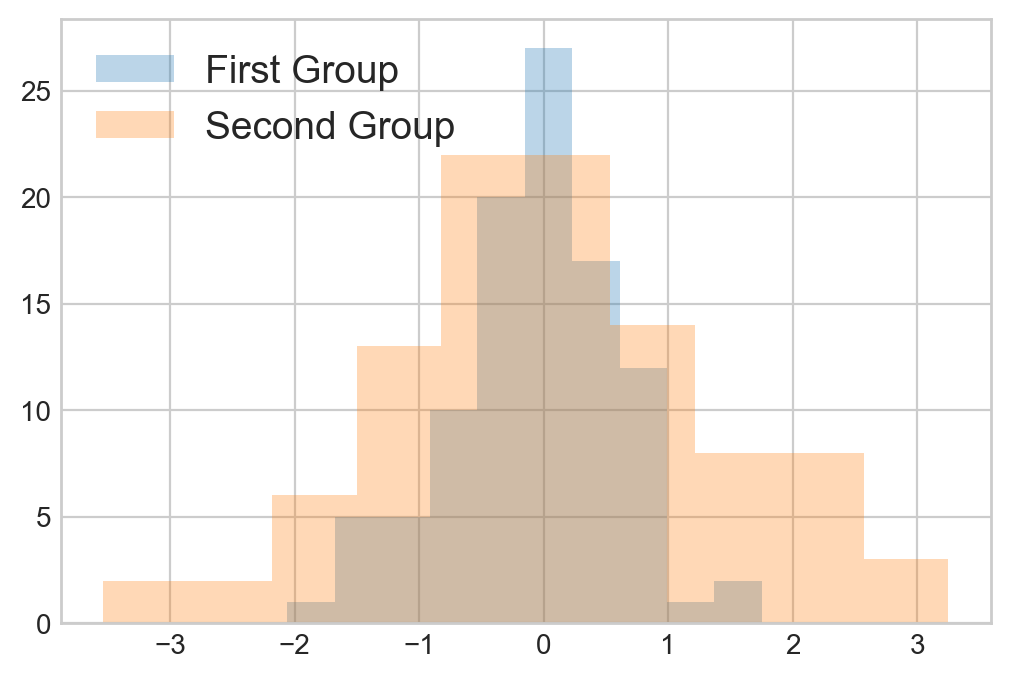

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.hist(transform_2_x[:n//2], alpha=0.3, label="First Group")
    plt.hist(transform_2_x[n//2:], alpha=0.3, label="Second Group")
    plt.legend(loc='upper left', fontsize=14)

    plt.show()

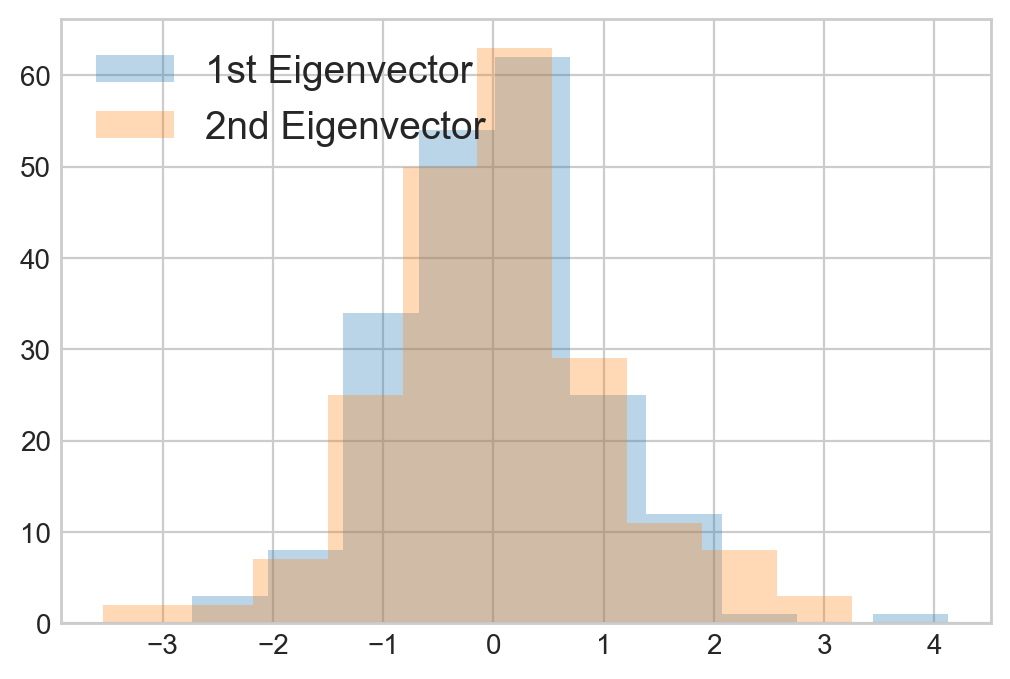

In [13]:
transform_1_x = x.T.dot(v[:,0])
transform_2_x = x.T.dot(v[:,1])

with plt.style.context('seaborn-whitegrid'):
    plt.hist(transform_1_x, alpha=0.3, label="1st Eigenvector")
    plt.hist(transform_2_x, alpha=0.3, label="2nd Eigenvector")
    plt.legend(loc='upper left', fontsize=14)

    plt.show()